### Visualization of 77 manualy selected landmarks

**Reference Source:**

The 77 selected landmarks are based on the following research:

- **Author:** B. Latoszek
- **Title:** "Application of Machine Learning Methods for Automatic Lie Detection"
  - Polish: "Zastosowanie metod uczenia maszynowego do automatycznej detekcji kłamstwa"
- **Type:** Master's Thesis
- **Institution:** Warsaw University of Technology (Politechnika Warszawska)
- **Year:** 2025
- **Implementation:** [https://github.com/Newtoneiro/automatic-lie-detection](https://github.com/Newtoneiro/automatic-lie-detection)

In [1]:
# Montowanie Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

In [3]:
def visualize_specific_landmarks_2d(npy_data_path, npy_indices_path):
    """
    Ujednolicona wizualizacja wybranych punktów MediaPipe w kwadratowym,
    proporcjonalnym układzie współrzędnych.
    """
    try:
        # 1. Wczytanie danych i indeksów
        sequence_np = np.load(npy_data_path).astype(np.float32)
        selected_indices = np.load(npy_indices_path).astype(int)

        print(f"Wczytano dane: {sequence_np.shape}")
        print(f"Wczytano {len(selected_indices)} indeksów do wyświetlenia.")

        # 2. Przygotowanie pierwszej klatki
        frame_0 = sequence_np[0, :]
        N_points = len(frame_0) // 3
        points = frame_0.reshape(N_points, 3)

        # 3. Filtrowanie punktów
        X = points[selected_indices, 0]
        Y = points[selected_indices, 1]

        # --- UJEDNOLICENIE SKALI I PROPORCJI ---
        # Obliczamy środek Twoich wybranych punktów
        center_x = (X.max() + X.min()) / 2
        center_y = (Y.max() + Y.min()) / 2

        # Ustalamy sztywny zakres (np. 0.5 jednostki w każdą stronę od środka)
        # Możesz dostosować tę wartość (0.5), jeśli twarz jest za mała lub za duża
        view_range = 0.5

        # 4. Rysowanie
        # Zmieniamy figsize na idealny kwadrat (8x8), aby uniknąć wizualnego rozciągnięcia
        fig, ax = plt.subplots(figsize=(8, 8))

        ax.scatter(X, Y,
                   c='dodgerblue',
                   s=40,
                   edgecolors='black',
                   linewidth=0.5,
                   alpha=0.8)

        # Ustawienia ujednolicające
        ax.set_title(f"Wizualizacja {len(selected_indices)} wybranych punktów", fontsize=12)

        # Kluczowe dla "okrągłej" twarzy:
        ax.set_aspect('equal', adjustable='box')

        # Ustawienie identycznych granic dla X i Y względem środka twarzy
        ax.set_xlim(center_x - view_range, center_x + view_range)
        ax.set_ylim(center_y + view_range, center_y - view_range) # Odwrócenie osi Y wewnątrz limitów

        plt.grid(True, linestyle='--', alpha=0.3)

        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"Wystąpił błąd: {e}")

Wczytano dane: (46, 1434)
Wczytano 77 indeksów do wyświetlenia.


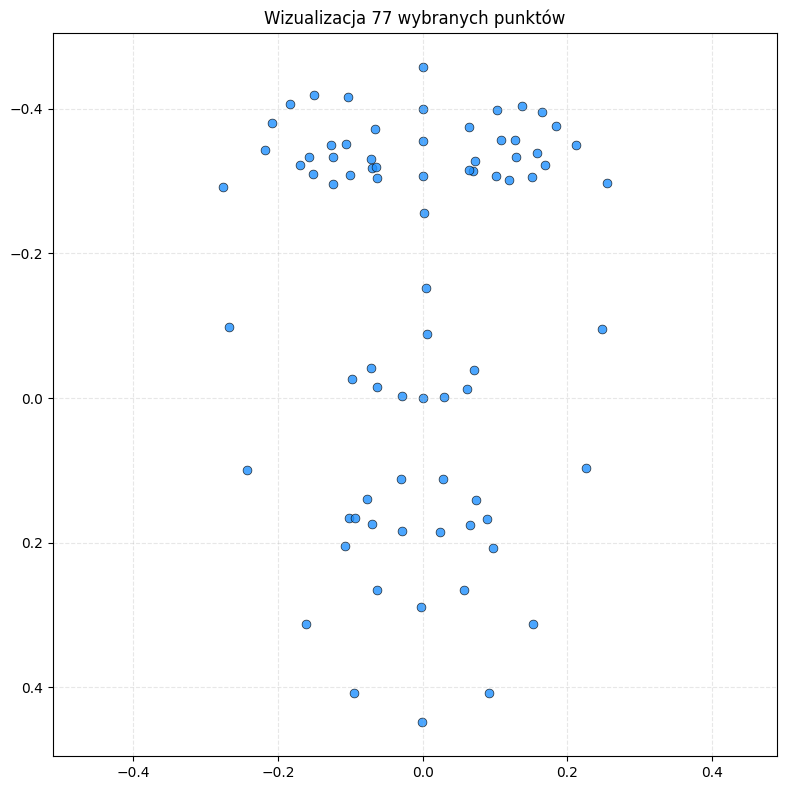

In [4]:
MY_INDICES = '/content/drive/MyDrive/PainRecognitionProject/data/manualy_selected_points.npy'

COLAB_ROOT = '/content/drive/MyDrive/PainRecognitionProject/'
RAVDESS_PROCESSED_DATA_DIR = os.path.join(COLAB_ROOT, 'data/RAVDESS_processed_478_xyz_frontalized/')
metadata_path = os.path.join(RAVDESS_PROCESSED_DATA_DIR, 'train_processed_metadata.csv')

df_meta = pd.read_csv(metadata_path)

example_row = df_meta[df_meta['label'] == 4].iloc[0]
npy_filename = os.path.basename(example_row['npy_path'])
example_npy_path = os.path.join(RAVDESS_PROCESSED_DATA_DIR, 'train', npy_filename)

visualize_specific_landmarks_2d(example_npy_path, MY_INDICES)